In [78]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as mp
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import cv2 as cv2
from sklearn.model_selection import train_test_split

In [62]:
df_yes = os.listdir("C:/Users/KIIT/Desktop/projects/Brain Tumor Detection/archive (2)/brain_tumor_dataset/yes")
df_yes[:5]

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg']

In [63]:
df_no = os.listdir("C:/Users/KIIT/Desktop/projects/Brain Tumor Detection/archive (2)/brain_tumor_dataset/no")
df_no[:5]

['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg']

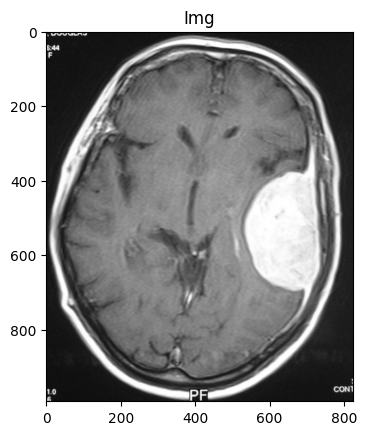

In [64]:
for i in range(5):
    img = mp.imread("C:/Users/KIIT/Desktop/projects/Brain Tumor Detection/archive (2)/brain_tumor_dataset/yes/"+df_yes[i+1])
    mp.imshow(img)
    mp.title("Img")
    i=i+1

In [65]:
df=[]
labels=[]
for img in df_yes:
    img_read = mp.imread("C:/Users/KIIT/Desktop/projects/Brain Tumor Detection/archive (2)/brain_tumor_dataset/yes/"+img)
    if(len(img_read.shape)==3):
        img_read = cv2.cvtColor(img_read, cv2.COLOR_BGR2GRAY)
    img_resize = cv2.resize(img_read, (50,50))
    img_array = img_to_array(img_resize)
    df.append(img_array)
    labels.append(1)

for img in df_no:
    img_read = mp.imread("C:/Users/KIIT/Desktop/projects/Brain Tumor Detection/archive (2)/brain_tumor_dataset/no/"+img)
    if(len(img_read.shape)==3):
        img_read = cv2.cvtColor(img_read, cv2.COLOR_BGR2GRAY)
    img_resize = cv2.resize(img_read, (50,50))
    img_array = img_to_array(img_resize)
    df.append(img_array)
    labels.append(0)

labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [71]:
df = np.array(df)
labels = np.array(labels)
labels.shape

(253,)

In [57]:
labels.shape

(1, 253)

In [75]:
idx = np.arange(df.shape[0])
np.random.shuffle(idx)
idx
df=df[idx]
labels = labels[idx]

In [76]:
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size = 0.2, random_state = 42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((202, 50, 50, 1), (202,), (51, 50, 50, 1), (51,))

In [79]:
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

In [90]:
y_train.shape, y_test.shape

((202, 2), (51, 2))

In [86]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Dropout, BatchNormalization, Flatten
from keras import optimizers
from keras import backend as K

In [176]:
def CNNb(h, w, c):
    model = Sequential()
    ip = (h,w,c)
    chandim=-1
    model.add(Conv2D(16, (3,3), activation='relu', input_shape = ip))
    model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization(axis=chandim))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(16  , (3,3), activation='relu', input_shape=ip))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis=chandim))
    model.add(Dropout(0.1))
    
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax'))
    
    return model              

### Model 1

In [177]:
emodel = CNNb(h=50, w=50, c=1)
emodel.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_43 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_66 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 11, 11, 32)     

In [178]:
emodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
emodel.fit(x_train, y_train, epochs = 20, batch_size=32)

Epoch 1/20
7/7 [==============================] - 2s 62ms/step - loss: 3.1836 - accuracy: 0.6337
Epoch 2/20
7/7 [==============================] - 0s 54ms/step - loss: 0.6186 - accuracy: 0.8020
Epoch 3/20
7/7 [==============================] - 0s 55ms/step - loss: 0.2131 - accuracy: 0.9208
Epoch 4/20
7/7 [==============================] - 0s 54ms/step - loss: 0.1539 - accuracy: 0.9505
Epoch 5/20
7/7 [==============================] - 0s 53ms/step - loss: 0.1036 - accuracy: 0.9604
Epoch 6/20
7/7 [==============================] - 0s 54ms/step - loss: 0.0520 - accuracy: 0.9901
Epoch 7/20
7/7 [==============================] - 0s 54ms/step - loss: 0.0336 - accuracy: 0.9901
Epoch 8/20
7/7 [==============================] - 0s 54ms/step - loss: 0.0168 - accuracy: 1.0000
Epoch 9/20
7/7 [==============================] - 0s 55ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 10/20
7/7 [==============================] - 0s 55ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 11/20
7/7 [============

In [179]:
y_pred = emodel.evaluate(x_test, y_test, verbose=0)
y_pred

[0.5319920778274536, 0.9215686321258545]

In [180]:
print("Loss:",y_pred[0])
print("Accuracy",y_pred[1])

Loss: 0.5319920778274536
Accuracy 0.9215686321258545


### Model 2

In [182]:
emodel2 = CNNb(h=50, w=50, c=1)
emodel2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_47 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_72 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_57 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 11, 11, 32)     

In [187]:
emodel2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
emodel2.fit(x_train, y_train, epochs = 20, batch_size=32)

Epoch 1/20
7/7 [==============================] - 2s 77ms/step - loss: 8.9673e-05 - accuracy: 1.0000
Epoch 2/20
7/7 [==============================] - 0s 64ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 0s 63ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 0s 64ms/step - loss: 2.7884e-04 - accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 0s 64ms/step - loss: 1.6356e-04 - accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 0s 63ms/step - loss: 1.8978e-05 - accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 0s 63ms/step - loss: 1.9169e-05 - accuracy: 1.0000
Epoch 8/20
7/7 [==============================] - 0s 65ms/step - loss: 3.1988e-06 - accuracy: 1.0000
Epoch 9/20
7/7 [==============================] - 0s 63ms/step - loss: 9.3188e-05 - accuracy: 1.0000
Epoch 10/20
7/7 [==============================] - 0s 64ms/step - loss: 1.0913e-05 - accuracy: 1.00

In [188]:
y_pred_2 = emodel2.evaluate(x_test, y_test)
y_pred_2

2/2 [==============================] - 0s 34ms/step - loss: 1.9372 - accuracy: 0.8431


[1.9372154474258423, 0.843137264251709]